<a href="https://colab.research.google.com/github/Nhutsang/CodeWeek10/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.datasets import cifar100
(x_train, y_train),(x_test,y_test) = cifar100.load_data()

In [11]:
import matplotlib.pyplot as plt

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


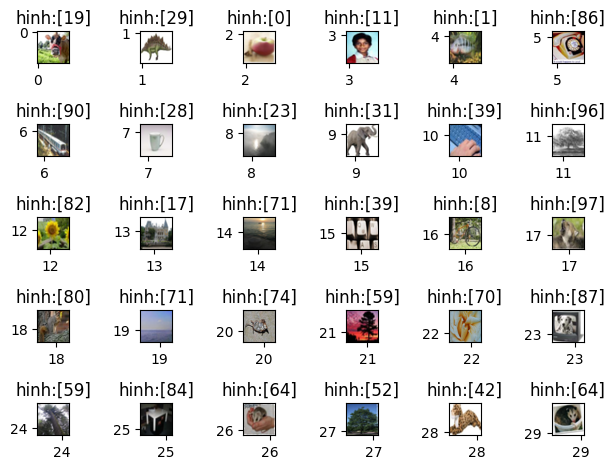

In [12]:
for i in range(30) :
  plt.subplot(5,6, i + 1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray',interpolation= 'none')
  plt.title('hinh:{}'.format(y_train[i]))
  plt.xticks([i])
  plt.yticks([i])

In [13]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()



In [14]:
model = Sequential()
model.add(Dense(7000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(3500,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))


model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7000)              21511000  
                                                                 
 dense_1 (Dense)             (None, 3500)              24503500  
                                                                 
 dense_2 (Dense)             (None, 1000)              3501000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 100)               50100     
                                                                 
Total params: 50,066,100
Trainable params: 50,066,100
Non-trainable params: 0
_________________________________________________________________


In [15]:
X = x_test
Y = y_test

In [16]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
print(x_train.shape)

(50000, 3072)


In [17]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255
print(x_test.shape)

(10000, 3072)


In [18]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)
print(y_train.shape)

(50000, 100)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs =10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

Epoch 1/10
391/391 [==============================] - 398s 1s/step - loss: 4.5133 - accuracy: 0.0398
Epoch 2/10
391/391 [==============================] - 388s 993ms/step - loss: 4.0148 - accuracy: 0.0790
Epoch 3/10
391/391 [==============================] - 383s 979ms/step - loss: 3.8010 - accuracy: 0.1130
Epoch 4/10
391/391 [==============================] - 392s 1s/step - loss: 3.6472 - accuracy: 0.1384
Epoch 5/10
391/391 [==============================] - 394s 1s/step - loss: 3.5301 - accuracy: 0.1610
Epoch 6/10
373/391 [===========================>..] - ETA: 17s - loss: 3.4316 - accuracy: 0.1762

In [ ]:
url = 'dog.jpg'
img = plt.imread(url)
plt.imshow(img)
plt.show()

In [ ]:
from keras.utils.image_utils import img_to_array,load_img
img = load_img(url,target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)